## WSTĘP

### NA CZYM POLEGA F1?

Grand Prix składa się z 3 segmentów:
- sesji treningowych
- kwalifikacji
- wyścigu

Sesje treningowe służą zespołom do sprawdzania bolidów, testowania opon na torze, czy oceny nowych podzespołów.
Ważniejszą częścią są kwalifikacje, które polegają na przejazdach na czas w pojedynkę, co później determinuje pozycję startową kierowcy w wyścigu. Wbrew pozorom, miejsce startowe ma kluczowe znaczenie, ponieważ podczas samego wyścigu kierowcy nie mają zbyt wielu możliwości na wyprzedzanie. Podczas ostatniego segmentu GP wyłaniany jest zwycięzca.


### BUDOWA POJAZDÓW

Ze względu na charakter F1, kluczowe dla zespołów biorących udział w zawodach jest zbudowanie jak najbardziej wydajnego bolidu, który będzie w stanie w możliwie jak najkrótszym czasie pokonać tor. Drużyny w każdym roku wydają setki milionów dolarów, aby osiągnąć ten cel. Największe znaczenie dla osiągów pojazdu mają: silnik (o mocy ok. 1000 KM), elementy aerodynamiczne oraz opony.

### CO BĘDZIEMY BRAĆ POD UWAGĘ?

Ze względu na to, że bardzo dużo różnych czynników wpływa na tor jazdy bolidu, na potrzeby naszego projektu musieliśmy zaniedbać takie czynniki jak: aerodynamika pojazdu, czyli działającego na niego opory powietrza oraz docisk (który sprawia, że przepływające przez aerodynamiczne elementy pojazdu powietrze “dociska” go do ziemi przy rozwijaniu większych prędkości), zużycie opon, warunki pogodowe, itp.
Postanowiliśmy także przenieść nasze rozważania na tor 2D (zakładamy, że kierowca porusza się po idealnie równym terenie). Skupimy się na wyznaczeniu najbardziej optymalnej trasy, przy stałej prędkości jazdy, zakładając także, że pojazd pokonując zakręt porusza się po okręgu.

## SIŁY FIZYKI PRZY RUCHU NA ZAKRĘCIE

Ruch samochodu na zakręcie po torze wyścigowym można opisać za pomocą ruchu krzywoliniowego, który wymaga rozpatrzenia dodatkowych sił działających na samochód w kierunku promienia zakrętu. Przyjmijmy, że samochód porusza się po płaskim torze o promieniu R, a jego prędkość wynosi v.
W przypadku ruchu po okręgu, siła skierowana w kierunku promienia zakrętu (siła odśrodkowa) działa na samochód i jest proporcjonalna do prędkości kwadratowej samochodu. 
\begin{equation*}
F = \frac{mv^2}{R}
\end{equation*}
Siła ta przeciwdziała siłom inercji, które dążą do utrzymania samochodu na trajektorii prostej.
<center>
    <img src="images/siły fizyki1.png" alt="siły_fizyki.png"> <img src="images/siły fizyki2.png" alt="siły_fizyki.png">
</center>


## GENEROWANIE NAJKRÓTSZYCH TRAS

W celu obliczenia najkrótszej trasy możliwej do pokonania przez pojazd, poruszający się po zadanym zakręcie, skorzystamy z funkcji generującej 1000 losowych zakrętów. Jest ona złożona z pętli, która przechodzi po kolejnych elementach, losowowo wygenerowanych tablic, zmiennych mieszczących się w zadeklarowanym przedziale. Tutaj ze względu na ogarniczenia, aby żadna wygenerowana droga nie wychodziła poza trasę, eliminujemy trasy które nie mieszczą się w ograniczeniach (ograniczenie_g oraz ograniczenie_d).

In [19]:
using Distributions
using Plots
using QuadGK
using ForwardDiff
using DataFrames

tab3 = Array{Function}(undef, 0)
tab4 = Array{Function}(undef, 0)
tab_dlugosci_luku = []
tab_dlugosci_luku_2 = []
x3 = []
y = []
r = []
al = []
dl = []

ograniczenie_d = 10 # promien krótszego łuku
ograniczenie_g = 20 # promien dluzszego luku
punktp_sx = 15 # z tego punktu start (x = 15)
punktp_sy = 0 # z tego punktu start (y =0)

    # Tworzenie trasy
f(x) = ograniczenie_g*sin(x)
g(x) = ograniczenie_g*cos(x)
h(x) = ograniczenie_d*sin(x)
j(x) = ograniczenie_d*cos(x)
tab1 = [g, j]
tab2 = [f, h]


function generowanie_tras(ograniczenie_d, ograniczenie_g)
    k = rand(Uniform(-100, 0), 200)
    c = rand(Uniform(-100, 100), 200)
    for t1 in k
        for t2 in c
            x2 = t1 #współrzędna x środka okregu wygenerowanego
            y3 = t2 #współrzedna y wygenerowanego okregu
            r1 = sqrt((x2-15)^2 + (y3)^2) # promien danego okregu
            odl = sqrt((x2)^2 + (y3)^2) # odl miedzy punktem (0,0), a srodkiem danego okregu
            y0 = y3 + sqrt((r1)^2 - (x2)^2) # punkt przeciecia z osia OY (0, y0)
            dluod = sqrt(15^2 + y0^2) # odl miedzy punktem (15,0) a (0,y0)
            if abs(r1-ograniczenie_d-0.25) > odl && y0 < ograniczenie_g-0.25 && r1<50 # ograniczenia
                al1 = acos(1-((dluod^2)/(2*r1^2))) # kąt tworzony przez punkty: (0,y0), sr danego okregu i (15,0) 
                dl1 = al1*r1  # dlugosc luku okregu miedzy (0,y0) i (15,0)
                push!(y, y3)
                push!(x3, x2)
                push!(r, r1)
                push!(al, al1)
                push!(dl, dl1)
            end
        end
    end

    for s in 1:length(r)
        p(x) = r[s]*sin(x) + y[s]
        q(x) = r[s]*cos(x) + x3[s]
        push!(tab3, q)
        push!(tab4, p)
    end
end
generowanie_tras(ograniczenie_d, ograniczenie_g)

## WYGENEROWANIE TRAS NA WYKRESIE

In [20]:
plot(tab3, tab4, -pi, pi, aspectratio=1, linewidth=1, xlim=(0, 20),
     ylim=(0, 20), legend=false)
plot!(tab1, tab2, 0, pi/2, aspectratio=1, linewidth=5, thickness_scaling=1, c=:black)

## OBLICZANIE DROGI JAKĄ POKONA POJAZD

### WYNIK OCZEKIWANY

Analizując podstawowy wzór fizyczny jakim jest: $\displaystyle s=\int \operatorname{d}s=\int v(t)\operatorname{d}t=\int r(\theta)\operatorname{d}\theta$, jesteśmy w stanie za pomocą badania zmiany kąta w konkretnym punkcie obliczyć optymalną drogę jaką powinien pokonać bolid aby ta była jak najbardziej optymalna. Tutaj dodatkowo posiłkując się spiralą Eulera jesteśmy w stanie wyznaczyć dwa koła będące naszą „trasą”, inaczej mówiąc jej ograniczeniami (jak na zalączonym obrazku). 

Jest to o tyle dogodne dla nas narzędzie iż dzięki takiemu przybliżeniu jesteśmy w stanie skorzystać z przekształconego wzoru i zamiast zmian kąta pod jakim pojazd się ustawia do trasy, które musiałyby bazować na dużych tablicach macierzowych za względu na pary punktów, korzystamy ze stałych promieni oraz danego przekształcenia: 
\begin{equation*}
\displaystyle s=\int \sqrt{\left(r_{1}+\left(\frac{r_{2}-r_{1}}{s_{1}}\right)\cdot s\right) \cdot \left(\frac{1}{\mu \cdot g}\right)}\operatorname{d}\!s.
\end{equation*}
Za pomocą tego wzoru zaimplementowanego do Julii sprawdzimy najkrótszą możliwą do pokonania trasę i będzie ona wartością bazową ze względu na jej stałość. 

### FUNKCJA PREZENTUJĄCA ZAKRĘT

In [21]:
function integrand(s::Float64, r1::Float64, r2::Float64, s1::Float64, m::Float64, g::Float64)
    u = r1 + (r2 - r1) / s1 * s
    sqrt(u/m*g)
end
a = 0.0
b = pi/2
max_order = 1000

1000

#### METODA PROSTOKĄTÓW

W tej metodzie korzystamy z definicji całki oznaczonej Riemanna, w której wartość całki interpretowana jest jako suma pól obszarów pod wykresem krzywej w zadanym przedziale całkowania $[x_{p}, x_{k}]$. Następnie sumę tę przybliżamy przy pomocy sumy pól odpowiednio dobranych prostokątów.

Przedział całkowania $[x_{p}, x_{k}]$ dzielimy na $n$ równo odległych punktów $x_{1}, x_{2}, ..., x_{n},$ jak na załączonej grafice.

<center>
    <img src="images/prostokaty.png" alt="metoda_prostokątów.png">
</center>


Następnie obliczamy odległości między prostokątami
\begin{equation*}
\Delta x = \frac{x_{k}-x_{p}}{n}
\end{equation*}
Dla każdego wyznaczonego w ten sposób punktu obliczamy wartość funkcji $f(x).$
Następnie obliczamy sumę iloczynów wyznaczonych wartości funkcji przez odległość $\Delta x$ między dwoma sąsiednimi punktami
\begin{equation*}
S = f_{1}\cdot\Delta x + f_{2}\cdot\Delta x + ... + f_{n}\cdot\Delta x = \Delta x \cdot (f_{1}+f_{2}+...+f_{n})
\end{equation*}

In [36]:
function integrate_rectangles(f, a, b, n)
    delta_x = (b - a) / n
    x_values = a .+ ((0:n-1) .+ 0.5) * delta_x
    f_values = f.(x_values)
    result = delta_x * sum(f_values)
    result
end


P = integrate_rectangles(x -> integrand(x, 10.0, 20.0, 1.0, 1.0, 10.0), a, b, max_order)

20.81292342039797

#### METODA TRAPEZÓW

Metoda ta jest podobna do poprzedniej z tym, że zamiast prostokątów używamy trapezów o wysokościach $\Delta x$ i podstawach równych odpowiednim wartościom funkcji $f(x)$ w punktach krańcowych.


<center>
    <img src="images\trapezy.png" alt="metoda_trapezów.png">
</center>


In [37]:
function integrate_trapezoids(r1::Float64, r2::Float64, s1::Float64, m::Float64, g::Float64, a::Float64, b::Float64, n::Int64)
    delta_s = (b - a) / n
    s_values = a .+ (0:n-1) * delta_s
    u_values = r1 .+ (r2 - r1) / s1 * s_values
    f_values = integrand.(s_values, r1, r2, s1, m, g)
    result = delta_s * ((integrand(a, r1, r2, s1, m, g) + integrand(b, r1, r2, s1, m, g)) / 2.0 + sum(f_values))
    result
end

T = integrate_trapezoids(10.0, 20.0, 1.0, 1.0, 10.0, a, b, max_order)

20.828630803342858

#### METODA SIMPSONA

Metoda ta jest podobna do poprzednich z tym, że do przybliżenia całki stosujemy parabolę.

<center>
    <img src="images\simpson.jpg" alt="metoda_simpsona.jpg">
</center>


In [24]:
function integrate_simpson(f, a, b, n)
    delta_x = (b - a) / n
    x_values = a .+ (0:n) * delta_x
    f_values = f.(x_values)
    coefficients = ifelse.(iseven.(0:n), 2, 4)
    sum = dot(coefficients, f_values)
    result = delta_x / 3 * (f(a) + f(b) + sum)
    result
end


S = integrate_simpson(x -> integrand(x, 10.0, 20.0, 1.0, 1.0, 10.0), a, b, max_order)

20.812923226956855

#### PRÓBA KONTROLNA (ZA POMOCĄ PAKIETU WBUDOWANEGO QUADGK)

In [25]:
function integrate(r1::Float64, r2::Float64, s1::Float64, m::Float64, g::Float64, a::Float64, b::Float64)
    f(s) = integrand(s, r1, r2, s1, m, g)
    Q, err=quadgk(f, a, b)
    Q, err
end
W = (integrate(10.0, 20.0, 1.0, 1.0, 10.0, a, b))

(20.812923226956958, 2.063025306142663e-10)

#### ZESTAWIENIE TABELARYCZNE OBLICZEŃ DOTYCZĄCYCH DROGI ZE STAŁEGO WZORU (PORÓWNANIE METOD)

In [26]:
tabela = DataFrame(PROSTOKĄTÓW = P, TRAPEZÓW = T, SIMPSONA = S, WBUDOWANA = W[1])
tabela

1×4 DataFrame
 Row │ PROSTOKĄTÓW  TRAPEZÓW  SIMPSONA  WBUDOWANA 
     │ Float64      Float64   Float64   Float64   
─────┼────────────────────────────────────────────
   1 │     20.8129   20.8035   20.8129    20.8129

### OBLICZANIE DŁUGOŚCI WYGENEROWANYCH TRAS

#### FUNKCJA RIEMANNA

Suma Riemanna jest jednym z najprostszych do zrozumienia przybliżeń pola powierzchni pod krzywą. Jej podstawową ideą jest to, że przedział [a, b] jest podzielony przez punkty $a=x_{0}<x_{1}<x_{2}<...<x_{n}=b$ i teren pod $f(x)$ jest aproksymowany przez prostokąt z podstawą $x_{i}+1 - x_{i}$ i wysokość podaną jako $f(s)$, gdzie s to jakiś punkt z przedziału $[x_{i}, x_{i+1}]$. Typowe wybory to lewy punkt lub prawy interwału lub wartośi x, która minimalizuje lub maksymalizuje przez interwał. Rysunek przedstawia te cztery opcje dla pewnej przykładowej funkcji. Dla funkcji całkowalnej Riemanna, takiej jak funkcja ciągła na zadanym przedziale, każda z opcji da taką samą wartość, do jakiej zmniejszy się siatka partycji.
<center>
    <img src="images\riemann_choice.png" alt="riemann_choice.png">
</center>


W naszym kodzie zaimplementowaliśmy funkcję do obliczenia całki metodą Riemanna. W omawianym kodzie danymi wejściowymi funkcji będą:
- funkcja,
- wartość początkowa i końcowa interwału oraz
- liczba równych podprzedziałów.

Ponadto dopuszczamy możliwość zastosowania różnych metod aproksymacji obszaru w podprzedziale. Wyróżniamy tu funkcje w których skorzystamy z:
- prostokąta z lewym końcem do określenia wysokości (method="left" )
- prostokąta z prawym końcem do określenia wysokości (method="right" )
- trapezu utworzonego przez połączenie lewego i prawego punktu końcowego (method="trapezoid" )
- wielomianu o stopniu dwa, który przechodzi przez lewy i prawy punkt końcowy oraz punkt środkowy ( method="simpsons")

In [27]:
function riemann(f, a::Real, b::Real, n::Int; method="right")
  if method == "right"
     meth = (f,l,r) -> f(r) * (r-l)
  elseif method == "left"
     meth= (f,l,r) -> f(l) * (r-l)
  elseif method == "trapezoid"
     meth = (f,l,r) -> (1/2) * (f(l) + f(r)) * (r-l)
  elseif method == "simpsons"
     meth = (f,l,r) -> (1/6) * (f(l) + 4*(f((l+r)/2)) + f(r)) * (r-l)
  end

  xs = range(a, b, length=n+1)
  lrs = zip(Iterators.take(xs, n), Iterators.rest(xs, 1))
  sum(meth(f, l, r) for (l,r) in lrs)
end

riemann (generic function with 1 method)

#### I SPOSÓB

Pierwszy sposób jaki uwzględnimy w naszym projekcie będzie bazował na wzorze: 
\begin{equation*}
L = 2\pi r \left(\frac{\theta}{360^{\circ}}\right).
\end{equation*}
Zawarty jest on w pętli kodu, gdzie za pomocą ... obliczamy kąt $\theta$ Wszystkie wartości z tych obliczeń zostają dodane do tablicy dl dzięki czmu mamy zestawienie poszczególnych długości.

In [28]:
print(argmin(dl), "\n") # numer argumentu o najkrotszym luku
print(dl[argmin(dl)])
dl

601
19.00268404336426

864-element Vector{Any}:
 25.421303910955643
 26.452915513774734
 24.109173026404083
 19.399949538916044
 25.64492012227547
 22.326179184729693
 22.562797258032884
 19.56185859067503
 25.723361265148995
 19.10377297505148
 20.04949291486184
 22.387017293829583
 25.476204120046415
  ⋮
 23.11702061484624
 20.938490301575644
 20.664296199595043
 23.710591563964705
 23.690747228448735
 24.5298720206404
 23.12572191764702
 24.249617400326954
 23.053493210568444
 22.75692959038375
 20.435282351056685
 23.142503984709215

#### II SPOSÓB

In [29]:
suma_kwadratow_left = []
for s in 1:length(r)
    dlugosc_luku = riemann(x -> sqrt((r[s]*cos(x))^2 + (r[s]*sin(x))^2), 0, al[s], 100, method="left")
    push!(suma_kwadratow_left, dlugosc_luku)
end
# suma_kwadratow_left

suma_kwadratow_right = []
for s in 1:length(r)
    dlugosc_luku = riemann(x -> sqrt((r[s]*cos(x))^2 + (r[s]*sin(x))^2), 0, al[s], 100, method="right")
    push!(suma_kwadratow_right, dlugosc_luku)
end
# suma_kwadratow_right

suma_kwadratow_trapezoid = []
for s in 1:length(r)
    dlugosc_luku = riemann(x -> sqrt((r[s]*cos(x))^2 + (r[s]*sin(x))^2), 0, al[s], 100, method="trapezoid")
    push!(suma_kwadratow_trapezoid, dlugosc_luku)
end
# suma_kwadratow_trapezoid

suma_kwadratow_simpsons = []
for s in 1:length(r)
    dlugosc_luku = riemann(x -> sqrt((r[s]*cos(x))^2 + (r[s]*sin(x))^2), 0, al[s], 100, method="simpsons")
    push!(suma_kwadratow_simpsons, dlugosc_luku)
end
# suma_kwadratow_simpsons

suma_kwadratow_wbudowana = []
for s in 1:length(r)
    dlugosc_luku = quadgk(x -> sqrt((r[s]*cos(x))^2 + (r[s]*sin(x))^2), 0, al[s])[1]
    push!(suma_kwadratow_wbudowana, dlugosc_luku)
end
# suma_kwadratow_wbudowana

In [30]:
suma = DataFrame(RIGHT = suma_kwadratow_right, LEFT = suma_kwadratow_left, TRAPEZÓW = suma_kwadratow_trapezoid, SIMPSONA = suma_kwadratow_simpsons, WBUDOWANA = suma_kwadratow_wbudowana)
suma

864×5 DataFrame
 Row │ RIGHT    LEFT     TRAPEZÓW  SIMPSONA  WBUDOWANA 
     │ Any      Any      Any       Any       Any       
─────┼─────────────────────────────────────────────────
   1 │ 25.4213  25.4213  25.4213   25.4213   25.4213
   2 │ 26.4529  26.4529  26.4529   26.4529   26.4529
   3 │ 24.1092  24.1092  24.1092   24.1092   24.1092
   4 │ 19.3999  19.3999  19.3999   19.3999   19.3999
   5 │ 25.6449  25.6449  25.6449   25.6449   25.6449
   6 │ 22.3262  22.3262  22.3262   22.3262   22.3262
   7 │ 22.5628  22.5628  22.5628   22.5628   22.5628
   8 │ 19.5619  19.5619  19.5619   19.5619   19.5619
   9 │ 25.7234  25.7234  25.7234   25.7234   25.7234
  10 │ 19.1038  19.1038  19.1038   19.1038   19.1038
  11 │ 20.0495  20.0495  20.0495   20.0495   20.0495
  ⋮  │    ⋮        ⋮        ⋮         ⋮          ⋮
 855 │ 20.6643  20.6643  20.6643   20.6643   20.6643
 856 │ 23.7106  23.7106  23.7106   23.7106   23.7106
 857 │ 23.6907  23.6907  23.6907   23.6907   23.6907
 858 │ 24.5299  24.5299  24.5299   24.5299   24.5299
 859 │ 23.1257  23.1257  23.1257   23.1257   23.1257
 860 │ 24.2496  24.2496  24.2496   24.2496   24.2496
 861 │ 23.0535  23.0535  23.0535   23.0535   23.0535
 862 │ 22.7569  22.7569  22.7569   22.7569   22.7569
 863 │ 20.4353  20.4353  20.4353   20.4353   20.4353
 864 │ 23.1425  23.1425  23.1425   23.1425   23.1425
                                       843 rows omitted

#### III SPOSÓB

Kolejną metodą dzięki której będziemy mogli porównać i tym samym zweryfikować wyniki będzie program który również będzie bazował na całce oznaczonej. Natomiast tym razem będzie to wzór znany w analizie jako wzór na długość krzywej, w naszym przypadku łuku. 
\begin{equation*}
\displaystyle L=\int_{a}^{b} \sqrt{1+[f'(x)]^{2}}\operatorname{d}\!x.
\end{equation*}
W widocznym wzorze wykorzystując wcześniej wygenerowane losowe trasy, oraz za pomocą zaimplementowanej przez nas funkcji „wielomian”, wyznaczamy wzory wielomianów które będą reprezentować trasę. Następnie wyznaczamy pochodną odpowiedniego wielomianu, tutaj domyślnie stopnia dwa, oraz obliczymy całkę oznaczoną z pierwiastka z sumy jedynki oraz kwadratu pochodnej funkcji. Odnosząc się do samej funkcji „wielomian” bazuje ona na wartościach pdpowiadających początkowi i końcowi trasy oraz wyznaczeniu prostej przechodzącej przez te punkty. Następnie program generuje łuk oraz wyznacza n punktów po których w dalszej części będzie przechodziła interacja aby z wykorzystaniem macierzy u nas w programie "A", wyznaczyć współczynniki wielomianu.

#### FUNKCJA WIELOMIAN

In [31]:
using Polynomials
function wielomian(r)
    # Wyznaczenie punktów końcowych łuku
    x1, y1 = r, 0
    x2, y2 = 0, r

    # Wyznaczenie równania prostej przechodzącej przez punkty (x1, y1) i (x2, y2)
    m = (y2 - y1) / (x2 - x1)
    b = y1 - m * x1

    # Wyznaczenie punktów przecięcia okręgu i prostej
    a = m^2 + 1
    b = 2 * m * b
    c = b^2 / 4 - r^2
    delta = sqrt(b^2 - 4 * a * c)
    x_1 = (-b + delta) / (2 * a)
    #x_2 = (-b - delta) / (2 * a)
    y_1 = m * x_1 + b
    #y_2 = m * x_2 + b

    # Wyznaczenie długości łuku między punktem (x1, y1) a punktem przecięcia (x_1, y_1)
    d = sqrt((x_1 - x1)^2 + (y_1 - y1)^2)

    # Wyznaczenie liczby punktów na łuku
    n = Int(round((d / r) * pi / 2))

    # Wyznaczenie punktów na łuku
    pary_punktow_luku = [(r * cos(t), r * sin(t)) for t in range(0, stop=pi/2, length=n)]

    # Wyznaczenie stopnia wielomianu
    stopien = div(n, 2)

    # Wyznaczenie współczynników wielomianu
    xs = [point[1] for point in pary_punktow_luku]
    ys = [point[2] for point in pary_punktow_luku]
    A = ones(n, stopien+1)
    for i=1:n
        for j=2:(stopien+1)
            A[i,j] = A[i,j-1] * xs[i]
        end
    end
    punkty = (A' * A) \ (A' * ys)
    return punkty
end

wielomian (generic function with 1 method)

In [32]:
wielomiany = []
for i in r
    miara = wielomian(i)
    push!(wielomiany, Polynomial([miara[1], miara[2], miara[3]]))  # Utwórz obiekt wielomianu za pomocą Polynomial
    n = 1000  # liczba punktów
end

wyniki_right = []
wyniki_left = []
wyniki_trapezoid = []
wyniki_simpsons = []

for i in wielomiany
    f_poly = Polynomial(i)  
    f_coeffs = coeffs(f_poly)  
    f_derivative = derivative(f_poly)  
    z(x) = sqrt(1 + f_derivative(x)^2)
    rr = riemann(z, 0, 15, 1000, method="right") 
    rl = riemann(z, 0, 15, 1000, method="left")
    rt = riemann(z, 0, 15, 1000, method="trapezoid")
    rs = riemann(z, 0, 15, 1000, method="simpsons")
    push!(wyniki_right, rr)
    push!(wyniki_left, rl)
    push!(wyniki_trapezoid, rt)
    push!(wyniki_simpsons, rs)
end

In [33]:
dlugosc_krzywej = DataFrame(RIGHT = wyniki_right, LEFT = wyniki_left, TRAPEZÓW = wyniki_trapezoid, SIMPSONA = wyniki_simpsons)
dlugosc_krzywej

864×4 DataFrame
 Row │ RIGHT    LEFT     TRAPEZÓW  SIMPSONA 
     │ Any      Any      Any       Any      
─────┼──────────────────────────────────────
   1 │ 18.3154  18.3064  18.3109   18.3109
   2 │ 18.3407  18.3315  18.3361   18.3361
   3 │ 18.2415  18.2327  18.2371   18.2371
   4 │ 17.313   17.3071  17.31     17.31
   5 │ 18.3231  18.314   18.3185   18.3185
   6 │ 18.0394  18.0311  18.0353   18.0352
   7 │ 18.0744  18.0661  18.0703   18.0703
   8 │ 17.3703  17.3643  17.3673   17.3673
   9 │ 18.3255  18.3164  18.3209   18.3209
  10 │ 17.2018  17.1963  17.199    17.199
  11 │ 17.5293  17.5227  17.526    17.526
  ⋮  │    ⋮        ⋮        ⋮         ⋮
 855 │ 15.6516  15.6534  15.6525   15.6525
 856 │ 15.6765  15.6779  15.6772   15.6772
 857 │ 15.6763  15.6776  15.677    15.677
 858 │ 15.6858  15.687   15.6864   15.6864
 859 │ 15.67    15.6714  15.6707   15.6707
 860 │ 15.6826  15.6839  15.6833   15.6833
 861 │ 15.6692  15.6706  15.6699   15.6699
 862 │ 15.666   15.6675  15.6667   15.6667
 863 │ 15.6517  15.6536  15.6526   15.6526
 864 │ 15.6702  15.6716  15.6709   15.6709
                            843 rows omitted

In [34]:
dlugosc_krzywej_2 = DataFrame(RIGHT = wyniki_sr, LEFT = wyniki_sl, TRAPEZÓW = wyniki_st, SIMPSONA = wyniki_ss)
dlugosc_krzywej_2

LoadError: UndefVarError: wyniki_sr not defined

#### TABELARYCZNE PORÓWNANIE WSZYSTKICH METOD (PRZY ZMIENNYCH DANYCH)

Wyniki w kolumnach "RIGHT", "LEFT", "TRAPEZÓW" i "SIMPSONA" są obliczane za pomocą metod numerycznych (np. metoda prawych końców, lewych końców, trapezów i Simpsona), które są przybliżone. Z drugiej strony, wyniki w kolumnach "WYCINEK" i "SUMA_KWADRATÓW_WBUDOWANA" są obliczane za pomocą metody geometrycznej, która jest dokładniejsza, ponieważ opiera się na bezpośrednim wyznaczeniu długości łuku i sumy kwadratów.

Metody numeryczne, takie jak metoda Riemanna, stosują przybliżone wartości funkcji na przedziałach, a wynik całkowania jest sumą tych przybliżonych wartości.

Z drugiej strony, metoda geometryczna opiera się na bezpośrednim wyznaczeniu długości łuku lub sumy kwadratów na podstawie geometrii figury. Jest to dokładniejsza metoda, ponieważ uwzględnia bezpośrednio kształt krzywej.

W rezultacie wyniki w kolumnach "WYCINEK" i "SUMA_KWADRATÓW_WBUDOWANA" mogą różnić się od wyników w kolumnach "RIGHT", "LEFT", "TRAPEZÓW" i "SIMPSONA". Różnica ta wynika z charakteru różnych metod obliczania całki i przybliżania wartości funkcji.

In [ ]:
dlugosc_drogi = DataFrame(RIGHT = wyniki_right, LEFT = wyniki_left, TRAPEZÓW = wyniki_trapezoid, SIMPSONA = wyniki_simpsons, WYCINEK = dl, SUMA_KWADRATÓW_RIGHT = suma_kwadratow_right, SUMA_KWADRATÓW_LEFT = suma_kwadratow_left, SUMA_KWADRATÓW_TRAPEZÓW = suma_kwadratow_trapezoid, SUMA_KWADRATÓW_SIMPSONA = suma_kwadratow_simpsons, SUMA_KWADRATÓW_WBUDOWANA = suma_kwadratow_wbudowana)
dlugosc_drogi

557×10 DataFrame
 Row │ RIGHT    LEFT     TRAPEZÓW  SIMPSONA  WYCINEK  SUMA_KWADRATÓW_RIGHT  SU ⋯
     │ Any      Any      Any       Any       Any      Any                   An ⋯
─────┼──────────────────────────────────────────────────────────────────────────
   1 │ 16.3273  16.3251  16.3262   16.3262   24.0828  24.0828               24 ⋯
   2 │ 16.2075  16.2058  16.2066   16.2066   22.3546  22.3546               22
   3 │ 16.3425  16.3403  16.3414   16.3414   24.3572  24.3572               24
   4 │ 15.9076  15.9074  15.9075   15.9075   19.4702  19.4702               19
   5 │ 16.1121  16.1109  16.1115   16.1115   21.299   21.299                21 ⋯
   6 │ 15.9967  15.996   15.9964   15.9964   20.2193  20.2193               20
   7 │ 16.3508  16.3485  16.3497   16.3497   24.5148  24.5148               24
   8 │ 16.3464  16.3442  16.3453   16.3453   24.4306  24.4306               24
   9 │ 16.3344  16.3322  16.3333   16.3333   24.2092  24.2092               24 ⋯
  10 │ 15.6519  15.6537  15.6528   15.6528   22.5846  22.5846               22
  11 │ 15.6516  15.6535  15.6525   15.6525   22.0385  22.0385               22
  ⋮  │    ⋮        ⋮        ⋮         ⋮         ⋮              ⋮               ⋱
 548 │ 15.6844  15.6857  15.685    15.685    19.7906  19.7906               19
 549 │ 16.2789  16.277   16.278    16.2779   24.2803  24.2803               24 ⋯
 550 │ 16.1678  16.1663  16.1671   16.1671   22.5344  22.5344               22
 551 │ 16.293   16.291   16.292    16.292    24.557   24.557                24
 552 │ 15.8885  15.8884  15.8884   15.8884   19.6042  19.6042               19
 553 │ 16.0792  16.0781  16.0786   16.0786   21.4647  21.4647               21 ⋯
 554 │ 15.9716  15.9711  15.9714   15.9714   20.3675  20.3675               20
 555 │ 16.3007  16.2987  16.2997   16.2997   24.7159  24.7159               24
 556 │ 16.2967  16.2946  16.2956   16.2956   24.631   24.631                24
 557 │ 16.2855  16.2835  16.2845   16.2845   24.4078  24.4078               24 ⋯
                                                  4 columns and 536 rows omitted

## GENEROWANIE NAJKRÓTSZYCH TRAS

In [ ]:
najkrotsze_trasy = []
promienie_najkrotszych_tras = []
czas = []

for i in 1:50
    generowanie_tras(ograniczenie_d, ograniczenie_g)
    push!(najkrotsze_trasy, dl[argmin(dl)])
    push!(promienie_najkrotszych_tras, r[argmin(dl)])
    push!(czas, dl[argmin(dl)]/10)
end

println("Średnia arytmetyczna najkrótszych długości tras: ", mean(najkrotsze_trasy))
zestawienie_najkrótszych_tras = DataFrame( DŁUGOŚĆ = najkrotsze_trasy, PROMIEŃ = promienie_najkrotszych_tras, CZAS = czas)

Średnia arytmetyczna najkrótszych długości tras: 18.94487974565984


50×3 DataFrame
 Row │ DŁUGOŚĆ  PROMIEŃ  CZAS    
     │ Any      Any      Any     
─────┼───────────────────────────
   1 │ 18.9783  28.0544  1.89783
   2 │ 18.9528  21.4548  1.89528
   3 │ 18.9528  21.4548  1.89528
   4 │ 18.9528  21.4548  1.89528
   5 │ 18.9528  21.4548  1.89528
   6 │ 18.9528  21.4548  1.89528
   7 │ 18.9528  21.4548  1.89528
   8 │ 18.9528  21.4548  1.89528
   9 │ 18.9445  24.1158  1.89445
  10 │ 18.9445  24.1158  1.89445
  11 │ 18.9445  24.1158  1.89445
  ⋮  │    ⋮        ⋮        ⋮
  41 │ 18.9426  24.0205  1.89426
  42 │ 18.9426  24.0205  1.89426
  43 │ 18.9426  24.0205  1.89426
  44 │ 18.9426  24.0205  1.89426
  45 │ 18.9426  24.0205  1.89426
  46 │ 18.9426  24.0205  1.89426
  47 │ 18.9426  24.0205  1.89426
  48 │ 18.9426  24.0205  1.89426
  49 │ 18.9426  24.0205  1.89426
  50 │ 18.9426  24.0205  1.89426
                  29 rows omitted

## NAJKRÓTSZA TRASA NA WYKRESIE

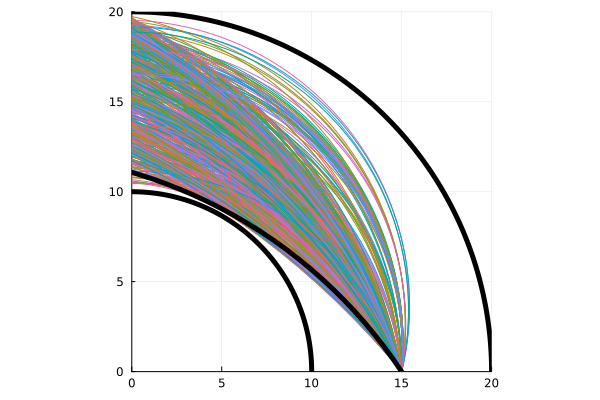

In [ ]:
plot(tab3, tab4, -pi, pi, aspectratio=1, linewidth=1, xlim=(0, ograniczenie_g),
     ylim=(0, ograniczenie_g), legend=false)
plot!(tab1, tab2, 0, pi/2, aspectratio=1, linewidth=5, thickness_scaling=1, c=:black)
plot!(tab3[argmin(dl)], tab4[argmin(dl)], -pi, pi, aspectratio=1, linewidth=5, thickness_scaling=1, c=:black)

## ANIMACJA TRASY

[ Info: Saved animation to C:\Users\Aleksandra\OneDrive\Documents\PROGRAMOWANIE\Julia\Projekt_Pakiety_Matematyczne\tmp.gif


Plots.AnimatedGif("C:\\Users\\Aleksandra\\OneDrive\\Documents\\PROGRAMOWANIE\\Julia\\Projekt_Pakiety_Matematyczne\\tmp.gif")
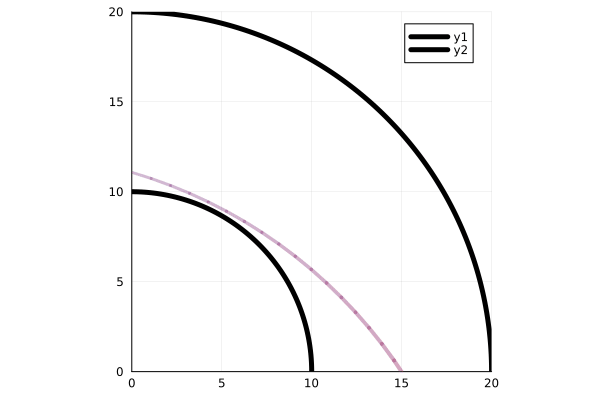

In [ ]:
@userplot CirclePlot
@recipe function f(cp::CirclePlot)
    x, y, i = cp.args
    n = length(x)
    inds = circshift(1:n, 1 - i)
    linewidth --> range(0, 10, length = n)
    seriesalpha --> range(0, 1, length = n)
    aspect_ratio --> 1
    label --> false
    x[inds], y[inds]
end

function animacja(num)
    n = 150
    t = range(-pi, π, length = n)
    y6 = r[num]*sin.(t) .+ y[num]
    x6 = r[num]*cos.(t) .+ x3[num] 
    
    anim = @animate for i ∈ 1:n
        circleplot!(x6, y6, i)
    end
    
    @gif for i ∈ 1:n
        plot(tab1, tab2, 0, pi/2, aspectratio=1, linewidth=5, thickness_scaling=1, c=:black)
        circleplot!(x6, y6, i, line_z = 1:n, cbar = false, framestyle = :zerolines,  xlim=(0,20), ylim=(0, 20))
    end every 5
end

animacja(argmin(dl))

## GENEROWANIE NAJKRÓTSZYCH TRAS

In [ ]:
najkrotsze_trasy = []
promienie_najkrotszych_tras = []
czas = []

for i in 1:50
    dl = []
    generowanie_tras(ograniczenie_d, ograniczenie_g)
    push!(najkrotsze_trasy, dl[argmin(dl)])
    push!(promienie_najkrotszych_tras, r[argmin(dl)])
    push!(czas, dl[argmin(dl)]/5) #przy prędkości stałej v = 5
end

println("Średnia arytmetyczna najkrótszych długości tras: ", mean(najkrotsze_trasy))
zestawienie_najkrótszych_tras = DataFrame( DŁUGOŚĆ = najkrotsze_trasy, PROMIEŃ = promienie_najkrotszych_tras, CZAS = czas)

Średnia arytmetyczna najkrótszych długości tras: 18.981510285806113


50×3 DataFrame
 Row │ DŁUGOŚĆ  PROMIEŃ  CZAS    
     │ Any      Any      Any     
─────┼───────────────────────────
   1 │ 18.9743  19.5553  3.79486
   2 │ 19.0975  47.6127  3.81949
   3 │ 18.9446  23.9207  3.78891
   4 │ 18.9841  41.5676  3.79681
   5 │ 19.0929  44.178   3.81858
   6 │ 18.9837  29.0351  3.79673
   7 │ 18.969   19.4825  3.7938
   8 │ 19.0127  42.8241  3.80253
   9 │ 18.9605  22.9364  3.7921
  10 │ 19.0042  19.5259  3.80084
  11 │ 18.9731  35.183   3.79462
  ⋮  │    ⋮        ⋮        ⋮
  41 │ 18.9922  25.9374  3.79845
  42 │ 18.9677  46.9521  3.79353
  43 │ 18.9733  46.4688  3.79467
  44 │ 18.998   43.7145  3.7996
  45 │ 18.9634  36.9795  3.79268
  46 │ 18.9522  41.6382  3.79044
  47 │ 18.9713  16.0053  3.79425
  48 │ 18.9755  35.7804  3.7951
  49 │ 18.9729  49.6338  3.79459
  50 │ 18.9749  20.1045  3.79498
                  29 rows omitted

https://www.youtube.com/watch?v=KBXMan0Dafw